# ML to Predict Home Prieces

## To Do & Goals
- Remove Outliers on price
- Explore missingno documentation.  Can I create a function that also returns the % of values that are missing per row?

In [1]:
# working with data
import os
import numpy as np
import pandas as pd
#import geopandas as gpd # the library that lets us read in shapefiles
#import geoplot as gplt # for plotting maps #having trouble getting this to install

# visulizaiton
from termcolor import colored # colored text
import missingno as msno # visuzlise missing data in a matrix
import matplotlib.pyplot as plt

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Setting work directory
cwd = os.getcwd()
print("current directory = " + cwd)

# os.chdir("../NotEssentialData")
# print("new directory = " + os.path.abspath(os.curdir))

current directory = C:\Users\ryjam\OneDrive\Documents\Ry Training\Personal Projects\USA-Real-Estate-Dataset


## add this to ReadMe
- https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download
This dataset contains Real Estate listings in the US broken by State and zip code. Data was collected via web scraping using python libraries.

## Explore the Data

In [3]:
# Input file - zip

fileInput = "data/realtor-data.zip"
df = pd.read_csv(fileInput, compression='zip').reset_index(drop=True)
print(len(df))
df.head(1)

923159


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64


<AxesSubplot: >

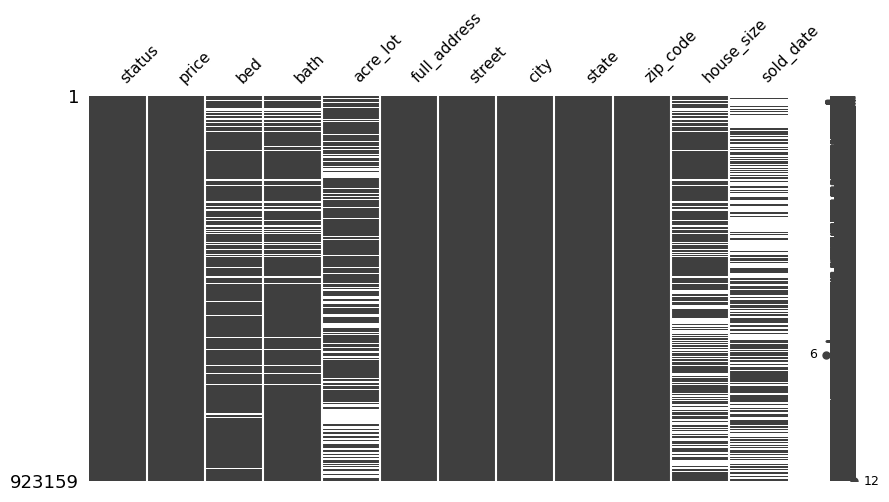

In [5]:
# explore missing values

print(df.isnull().sum())
msno.matrix(df, figsize=(10,5), fontsize=11)

In [6]:
# # large dataset, having difficulty getting this to work

# # Pair Plot features agaist one another
# sns.pairplot(df)

In [7]:
# function to show the distriubtion of numieric features
def ShowDistributionFuc(var):
    '''
    This function will only works with numierc values.
    Shows statistics & displays a histogram - boxplot combo.
    '''

    # Get statistics
    min_val = var.min()
    mean_val = var.mean()
    med_val = var.median()
    mod_val = var.mode()[0]
    max_val = var.max()
    print(colored('Min: ' + str(min_val), 'grey'))
    print(colored('Mean: ' + str(mean_val), 'cyan'))
    print(colored('Median: ' + str(med_val), 'red'))
    print(colored('Mode: ' + str(mod_val), 'yellow'))
    print(colored('Max: ' + str(max_val), 'grey'))


    # Create a figure for 2 subplots (2 rows, 1 column)(historgram & boxplot)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))
    fig.suptitle('Data Distribution')

    # Plot the histogram, add lines for the mean, median, and mode
    ax[0].hist(var)
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var, vert=False)
    ax[1].set_xlabel('Value')

    fig.show()

Min: 0.0
Mean: 884122.5224756469
Median: 475000.0
Mode: 499000.0
Max: 875000000.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_12436\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


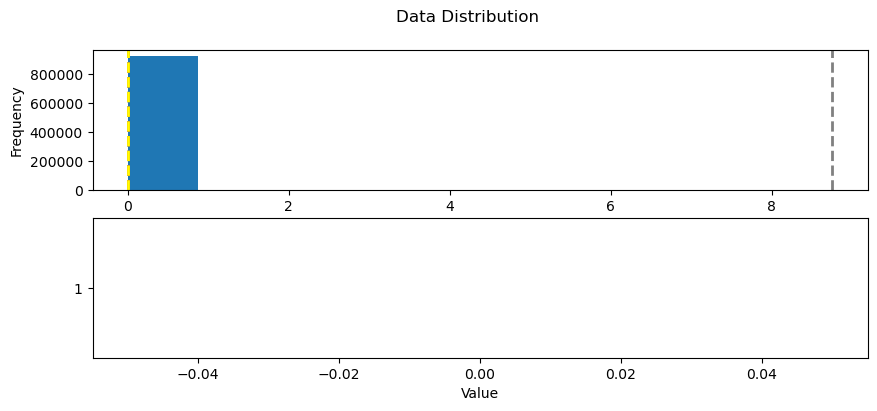

In [8]:
# Distribution of 'price'

ShowDistributionFuc(df['price'])

Min: 1.0
Mean: 3.3303519083815147
Median: 3.0
Mode: 3.0
Max: 123.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_12436\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


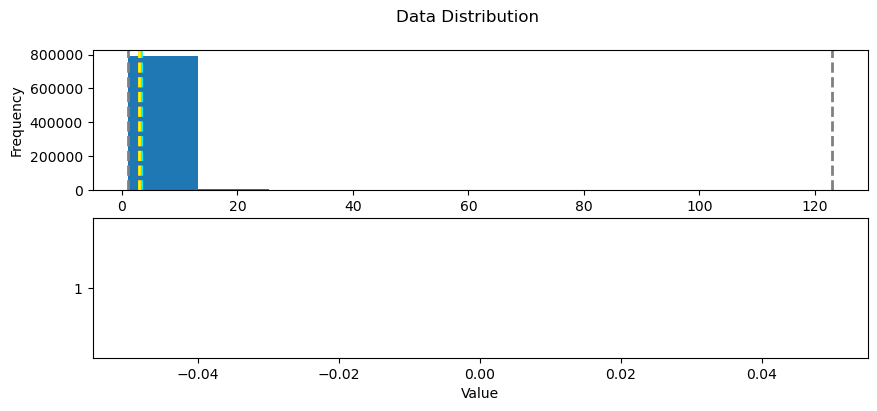

In [9]:
# Distribution of 'bed'

ShowDistributionFuc(df['bed'])

Min: 1.0
Mean: 2.4881635017271746
Median: 2.0
Mode: 2.0
Max: 198.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_12436\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


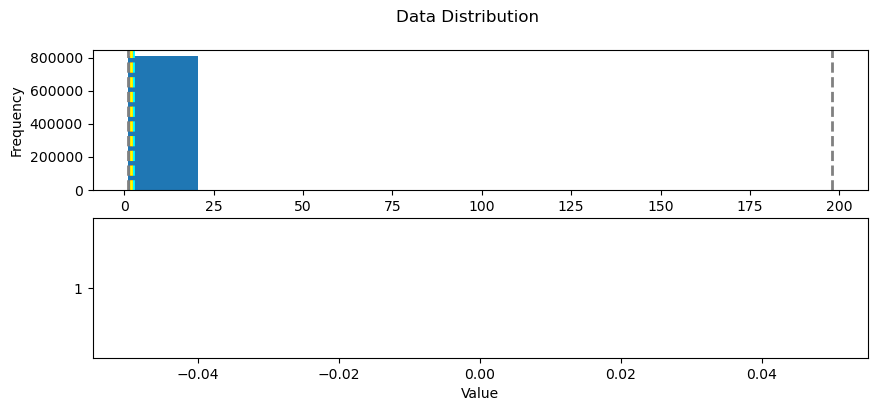

In [10]:
# Distribution of 'bath'

ShowDistributionFuc(df['bath'])

Min: 100.0
Mean: 2141.644071157623
Median: 1651.0
Mode: 1200.0
Max: 1450112.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_12436\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


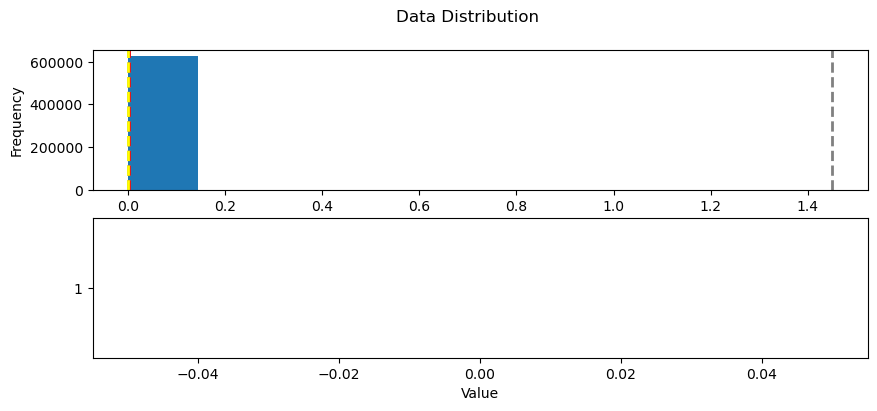

In [11]:
# Distribution of 'house_size'

ShowDistributionFuc(df['house_size'])

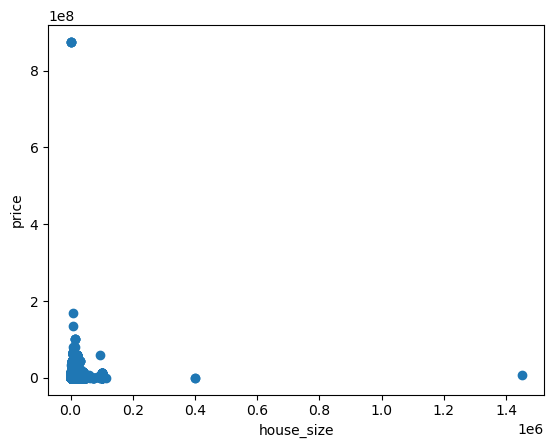

In [12]:
# compare price to house_size

plt.scatter(x=df['house_size'], y=df['price'])
plt.xlabel("house_size")
plt.ylabel("price")
plt.show()

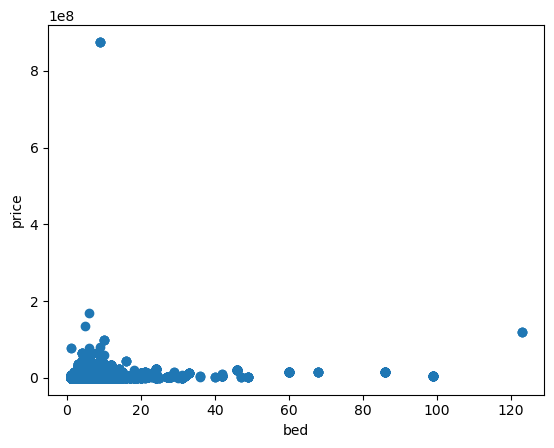

In [13]:
# compare price to bed

plt.scatter(x=df['bed'], y=df['price'])
plt.xlabel("bed")
plt.ylabel("price")
plt.show()

## Clean the Data
- create new working dataframe
- remove duplicate entries
- remove outliers
    - households with a price >= $1,000,000
    - remove households with a bed >= 60
- normlize the data
- One-Hot encoding status & state valeus

In [14]:
# create new dataframe
# remove duplicate entries

newColumns = ['status', 'price', 'bed', 'bath', 'acre_lot', 'state', 'house_size']
df1 = df[newColumns].copy().dropna().drop_duplicates().reset_index(drop=True)
print(len(df1))
df1.head(1)

53127


,status,price,bed,bath,acre_lot,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,Puerto Rico,920.0


44937
Min: 500.0
Mean: 429659.4126888755
Median: 384999.0
Mode: 299900.0
Max: 999999.0
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_12436\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,status,price,bed,bath,acre_lot,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,Puerto Rico,920.0


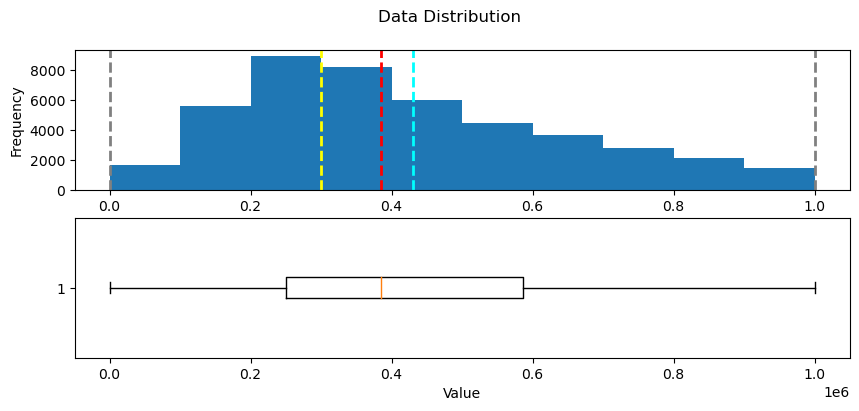

In [15]:
# remove households with pirce >= $1,000,000
df1 = df1[df1['price'] < 1000000]
print(len(df1))
print(ShowDistributionFuc(df1['price']))
df1.head(1)

44937
Min: 1.0
Mean: 3.480561675234217
Median: 3.0
Mode: 3.0
Max: 31.0
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_12436\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,status,price,bed,bath,acre_lot,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,Puerto Rico,920.0


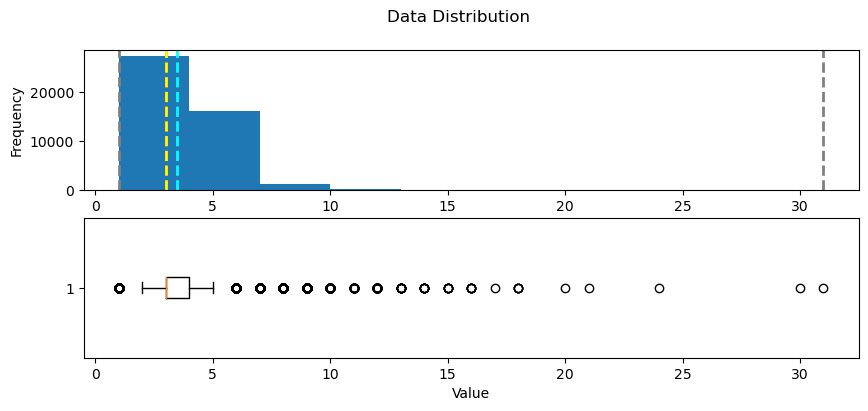

In [16]:
# remove households with bed >= 60
df1 = df1[df1['bed'] < 60]
print(len(df1))
print(ShowDistributionFuc(df1['bed']))
df1.head(1)

In [17]:
# One-Hot encode the status & state values
df1 = pd.get_dummies(df1, columns=["status"], drop_first=False)
df1 = pd.get_dummies(df1, columns=["state"], drop_first=False)
df1.head()

,price,bed,bath,acre_lot,house_size,status_for_sale,state_Connecticut,state_Delaware,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands,state_West Virginia,state_Wyoming
0,105000.0,3.0,2.0,0.12,920.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,80000.0,4.0,2.0,0.08,1527.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,67000.0,2.0,1.0,0.15,748.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,145000.0,4.0,2.0,0.10,1800.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,179000.0,4.0,3.0,0.46,2520.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Train & Fit a Regression Model

In [18]:
from sklearn.model_selection import train_test_split
# use price as the label

X, y = df1[df1.columns[1:-1]].values, df1[df1.columns[0]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 31455, rows
Test Set: 13482 rows


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

MSE: 32839085962.137413
RMSE: 181215.57869603104
R2: 0.3817479484386078


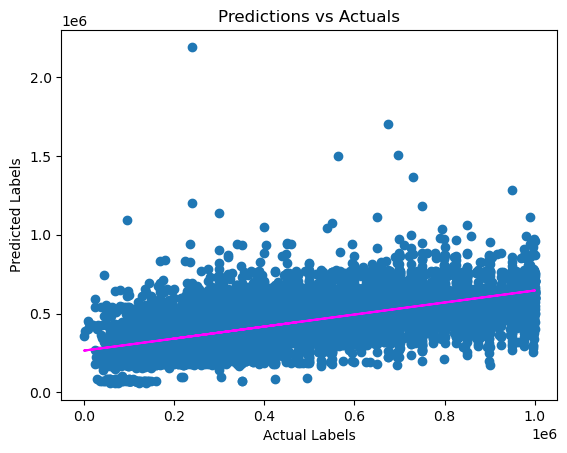

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Feature Scaling
- let's try normalzing the datagframe

In [21]:
df2 = df1.copy()
# apply normalization techniques
for column in df2.columns:
    df2[column] = df2[column]  / df2[column].abs().max()
df2.head()

,price,bed,bath,acre_lot,house_size,status_for_sale,state_Connecticut,state_Delaware,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands,state_West Virginia,state_Wyoming
0,0.105,0.096774,0.111111,1.200000e-06,0.002299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.080,0.129032,0.111111,8.000000e-07,0.003816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.067,0.064516,0.055556,1.500000e-06,0.001869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.145,0.129032,0.111111,1.000000e-06,0.004498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.179,0.129032,0.166667,4.600000e-06,0.006298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X, y = df2[df2.columns[1:-1]].values, df2[df2.columns[0]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))
model.fit(X_train, y_train)

Training Set: 31455, rows
Test Set: 13482 rows


LinearRegression()

MSE: 0.03283915164040763
RMSE: 0.18121575991179031
R2: 0.38174794843861215


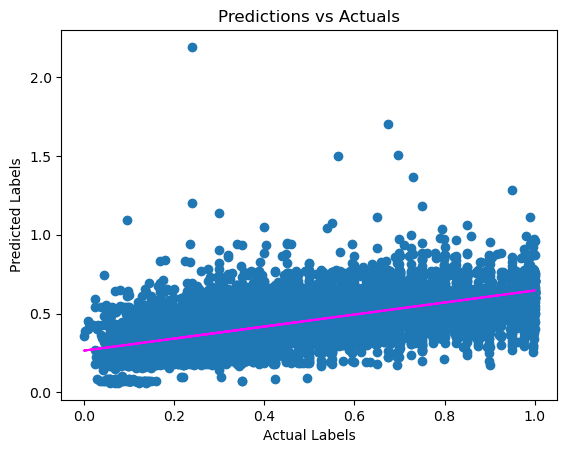

In [23]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model
- Save your trained model
- Use it to predict the price of a home with dummy data

In [25]:
import joblib

filename = './home_price_model.pkl'
joblib.dump(model, filename)

['./home_price_model.pkl']

In [ ]:
# dummy data
# An array of features for each transaction (don't include the transaction date)
newColumns = ['status', 'price', 'bed', 'bath', 'acre_lot', 'state', 'house_size']
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

In [ ]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))